In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Load the data
train_data = np.loadtxt("ridgetrain.txt")
test_data = np.loadtxt("ridgetest.txt")

# Extract the data in suitable form
X_train = train_data[:, 0].reshape(-1, 1)
y_train = train_data[:, 1]
X_test = test_data[:, 0].reshape(-1, 1)
y_test = test_data[:, 1]

In [3]:
# RBF kernel function
def rbf_kernel(x1, x2, gamma=0.1):
    return np.exp(-gamma * np.sum((x1[:, np.newaxis] - x2) ** 2, axis=-1))

# Calculate the Root Mean Squared Error (RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [4]:
# Function to plot the predictions and true outputs
def plot_predictions(X_test, y_test, y_pred, title):
    plt.scatter(X_test[:, 0], y_test, c = "blue", label = "True outputs")
    plt.scatter(X_test[:, 0], y_pred, c = "red", label = "Predicted outputs")
    plt.title(title)
    plt.legend()
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.show()

In [5]:
# Function to perform Kernel Ridge Regression
def kernel_ridge_regression(X_train, y_train, X_test, lam, gamma = 0.1):
    K_train = rbf_kernel(X_train, X_train, gamma)
    K_test = rbf_kernel(X_test, X_train, gamma)
    alpha = np.linalg.solve(K_train + lam * np.eye(len(K_train)), y_train)
    y_pred = np.dot(K_test, alpha)
    return y_pred

In [6]:
# Function to perform Ridge Regression with landmark based features
def landmark_ridge(X_train, y_train, X_test, L, lam = 0.1, gamma = 0.1):
    landmarks = X_train[np.random.choice(len(X_train), L, replace = False)]
    X_train_transformed = rbf_kernel(X_train, landmarks, gamma)
    X_test_transformed = rbf_kernel(X_test, landmarks, gamma)
    beta = np.linalg.solve(np.dot(X_train_transformed.T, X_train_transformed) + lam * np.eye(L), np.dot(X_train_transformed.T, y_train))
    y_pred = np.dot(X_test_transformed, beta).reshape(-1)
    return y_pred

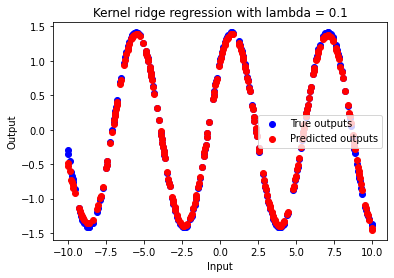

RMSE for Kernel Ridge Regression with lambda = 0.1: 0.0326


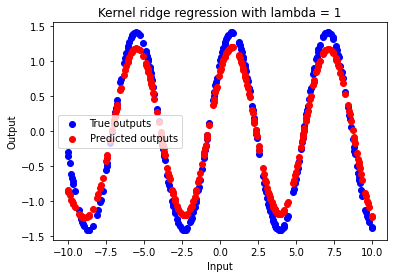

RMSE for Kernel Ridge Regression with lambda = 1: 0.1703


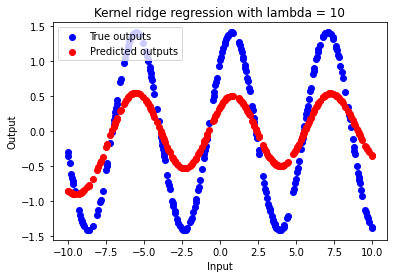

RMSE for Kernel Ridge Regression with lambda = 10: 0.6093


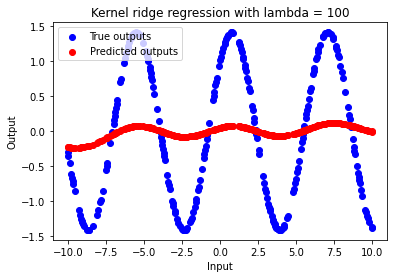

RMSE for Kernel Ridge Regression with lambda = 100: 0.9111


In [7]:
# Performing Kernel Ridge Regression for different values of lambda
for lam in [0.1, 1, 10, 100]:
    y_pred = kernel_ridge_regression(X_train, y_train, X_test, lam)
    plot_predictions(X_test, y_test, y_pred, f"Kernel ridge regression with lambda = {lam}")
    print(f"RMSE for Kernel Ridge Regression with lambda = {lam}: {rmse(y_test, y_pred):.4f}")

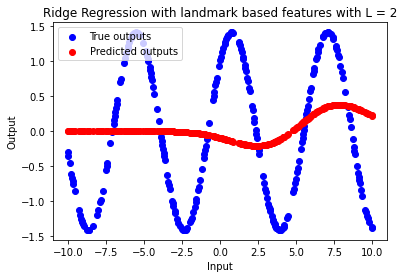

RMSE for Ridge Regression with landmark based features with L = 2: 0.9630


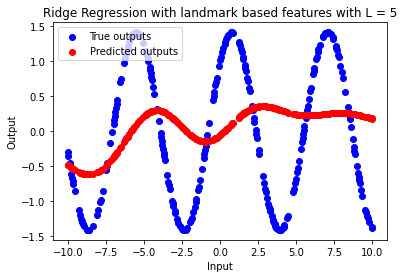

RMSE for Ridge Regression with landmark based features with L = 5: 0.9629


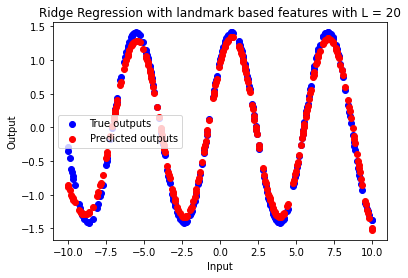

RMSE for Ridge Regression with landmark based features with L = 20: 0.1035


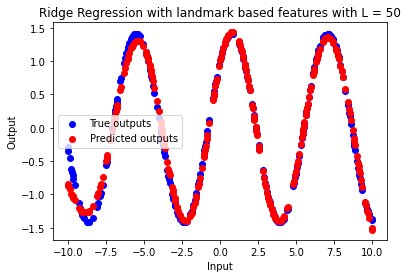

RMSE for Ridge Regression with landmark based features with L = 50: 0.0967


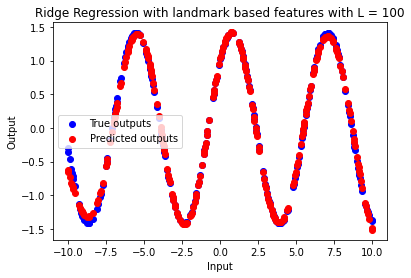

RMSE for Ridge Regression with landmark based features with L = 100: 0.0540


In [8]:
# Performing Ridge Regression with landmark based features for different values of L
for L in [2, 5, 20, 50, 100]:
    y_pred = landmark_ridge(X_train, y_train, X_test, L)
    plot_predictions(X_test, y_test, y_pred, f"Ridge Regression with landmark based features with L = {L}")
    print(f"RMSE for Ridge Regression with landmark based features with L = {L}: {rmse(y_test, y_pred):.4f}")